<p style ="text-align:center">
    <img src="http://epecora.com.br/DataFiles/BannerUFPR.png" width="700" alt="PPGOLD/PPGMNE Python:INTRO"  />
</p>


# SAOP09 - Data Science For Business
## Prof. Eduardo Pécora

## Regressão Linear Simples
Tempo estimado: **60** minutos

### Objetivos

Após completar esta aula, você será capaz de:

* Criar um modelo de regressão linear simples
* Calcular o erro R^2
* Calcular o MAE, MSE, MSRE e MAPE

## Bibliotecas

In [1]:
# importando a biblioteca pandas para manipulação de dados
import pandas as pd

# Iportando numpy para criar, manipular e operar em arrays multidimensionais, bem como para realizar operações matemáticas avançadas.
import numpy as np

# Importando a biblioteca math que fornece funções matemáticas básicas
import math 

# importando as bibliotecas do matplotlib para gerar gráficos
import matplotlib as mpl
import matplotlib.pyplot as plt

# Importando biblioteca do seaborn para gerar gráficos mais atraentes e informativos
import seaborn as sns

# Importando a classe LinearRegression do sklearn 
# Essa classe implementa uma versão da regressão linear simples ou múltipla
# Usado para modelar a relação entre uma variável dependente contínua e uma ou mais variáveis independentes.
from sklearn.linear_model import LinearRegression

# Usado para exibir os gráficos gerados pela biblioteca Matplotlib diretamente no notebook, sem precisar abrir uma janela externa.
%matplotlib inline

## Obtendo dados

In [2]:
# Caminho do arquivo csv
caminho = "https://raw.githubusercontent.com/EduPekUfpr/PythonProject/refs/heads/main/Dados/MeuAutoLimpo.csv" 

#Obtendo arquivo e passando-o para um dataframe
df = pd.read_csv(caminho)

In [3]:
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,1,164,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0


In [4]:
df.shape

(201, 26)

## Regressão Linear Simples

### Revisando

$$
    X : Variável \ independente \\
    Y : Variável \ dependente
$$

**Função Linear**
$$
    Yhat = \alpha + \beta  X
$$

* a : se refere ao intercepto da regressão linear, ou seja, o valor de Y quando X é 0.
* b : se refere a inclinação da reta, ou seja, o valor com o qual Y muda quando X aumenta em uma unidade.

### Implementação

* Como poderia `highway-mpg` nos ajudar a prever o preço do carro?
* Para este exemplo, queremos ver como a `highway-mpg` pode nos ajudar a prever o preço do carro.
* Usando a regressão linear simples, criaremos uma função linear com `highway-mpg` como a variável preditor e o `price` como a variável de resposta.

In [5]:
# Criando um objeto para regressão
lm = LinearRegression()
lm

LinearRegression()

In [6]:
# Criando um novo dataframe apenas com as variáveis que serão usadas no modelo
df_linear = df[['price','highway-mpg']].copy(deep=True)

# Renomeando porque o modelo não gosta de traços
df_linear = df_linear.rename(columns={'highway-mpg': 'highway_mpg'})

# Verificando a estatística descritiva
df_linear.describe()

,price,highway_mpg
count,201.000000,201.000000
mean,13207.129353,30.686567
std,7947.066342,6.815150
min,5118.000000,16.000000
25%,7775.000000,25.000000
50%,10295.000000,30.000000
75%,16500.000000,34.000000
max,45400.000000,54.000000


Text(0, 0.5, 'price')

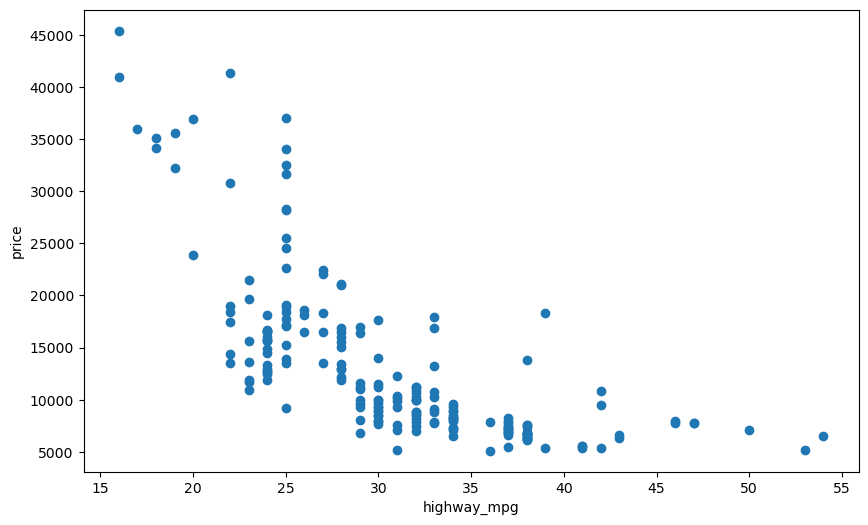

In [7]:
# Aqui o SciKit Learn precisa da amostras e da dimensão, 
# por isso precisamos passar uma matriz ou dataFrame
X = df_linear[['highway_mpg']] 

# variável dependente
Y = df_linear['price'] 

# Criando a área do gráfico
plt.figure(figsize=(10,6))

# Criando um gráfico de dispersão
plt.scatter(X,Y)

# Criando o título do eixo x
plt.xlabel(xlabel='highway_mpg')

# Criando os título do eixo y
plt.ylabel(ylabel='price')

* Aplica o modelo Linear usando somente `highway-mpg` como variável Independente

In [8]:
# Criando a regressão
lm.fit(X,Y)

LinearRegression()

In [9]:
# Valores da predição
Yhat = lm.predict(X)

# Criando uma nova coluna Yhat
df_linear.loc[:,'Yhat'] = Yhat

# Mostrando as primeira 20 linhas
df_linear.head(20)

,price,highway_mpg,Yhat
0,13495.0,27,16236.504643
1,16500.0,27,16236.504643
2,16500.0,26,17058.238022
3,13950.0,30,13771.304508
4,17450.0,22,20345.171535
5,15250.0,25,17879.971400
6,17710.0,25,17879.971400
7,18920.0,25,17879.971400
8,23875.0,20,21988.638292
9,16430.0,29,14593.037887


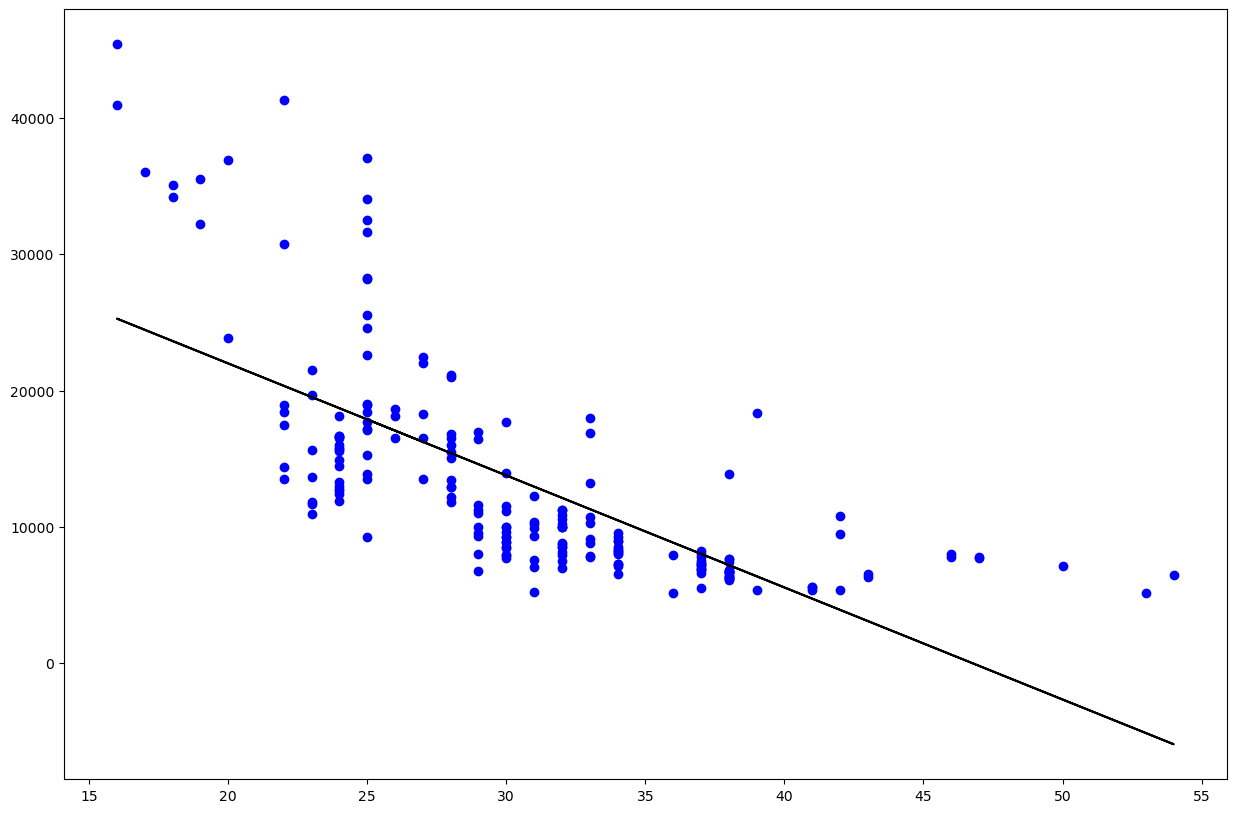

In [10]:
# Criando a área do gráfico
plt.figure(figsize=(15, 10))

# Criando  um gráfico de dispersão
plt.scatter(X, Y,color='b')

# Criando um gráfico de linhas
plt.plot(np.array(X), Yhat,color='k')

* Qual o valor do intercepto (a)?

In [11]:
# Obtendo o valor do intercepto (alpha)
alpha = lm.intercept_
print(f'O valor do alpha é: {alpha:.3f}')

O valor do alpha é: 38423.306


* Qual o valor da inclinação da reta (b)?

In [12]:
# Obtendo o valor da inclinação (slope)
beta = lm.coef_
print(f'O valor do beta é: {beta[0]:.3f}')

O valor do beta é: -821.733


* E agora se calcularmos os valores da predição através da formula?

In [13]:

# Calculando o valor predito com os valores do intercepto e inclinação
df_linear.loc[:,'YhatCalc'] = alpha+beta*df_linear['highway_mpg']

# Mostrando as 20 primeiras linhas
df_linear.head(20)

,price,highway_mpg,Yhat,YhatCalc
0,13495.0,27,16236.504643,16236.504643
1,16500.0,27,16236.504643,16236.504643
2,16500.0,26,17058.238022,17058.238022
3,13950.0,30,13771.304508,13771.304508
4,17450.0,22,20345.171535,20345.171535
5,15250.0,25,17879.971400,17879.971400
6,17710.0,25,17879.971400,17879.971400
7,18920.0,25,17879.971400,17879.971400
8,23875.0,20,21988.638292,21988.638292
9,16430.0,29,14593.037887,14593.037887


In [14]:
# Analisando as descritivas, mínimo, máximo, médias e etc.
df_linear.describe()

,price,highway_mpg,Yhat,YhatCalc
count,201.000000,201.000000,201.000000,201.000000
mean,13207.129353,30.686567,13207.129353,13207.129353
std,7947.066342,6.815150,5600.236181,5600.236181
min,5118.000000,16.000000,-5950.296571,-5950.296571
25%,7775.000000,25.000000,10484.370995,10484.370995
50%,10295.000000,30.000000,13771.304508,13771.304508
75%,16500.000000,34.000000,17879.971400,17879.971400
max,45400.000000,54.000000,25275.571805,25275.571805


## Cálculo dos erros:

### R2

$$
R^2 = \dfrac{\sum_{i=1}^n{(y_i-f_i)^2}}{n\cdot Var(X)}
$$
onde:
- $n$: quantidade de dados;
- $y_i$: valor real das observações;
- $f_i$: valor previsto das observações;
- $Var(X)$: variância dos dados, calculada a partir de $\dfrac{1}{n}\sum_{i=1}^n{(y_i-\mu)^2}$, onde $\mu$ é a média dos dados.

* R2 = 1
    * Todos os pontos observados estão sobre a reta estimada. 
    * Neste caso, as variações de Y são 100% explicadas pelas variações de X, através da função especificada, não havendo desvios em torno da reta estimada.
* R2 = 0
    * As variáveis de Y são puramente aleatórias e a inclusão da variável X no modelo não trará informação alguma sobre as variações de Y.


In [15]:
# Obtendo o score (R^2)
R2=lm.score(X, Y)

# Printando na tela 
print("SCORE: ",R2)

SCORE:  0.4965911884339175


* Vamos usar o recurso gráfico para comparar o preço previsto vs o real.

Text(45900, 3.3e-05, 'SCORE: 0.497')

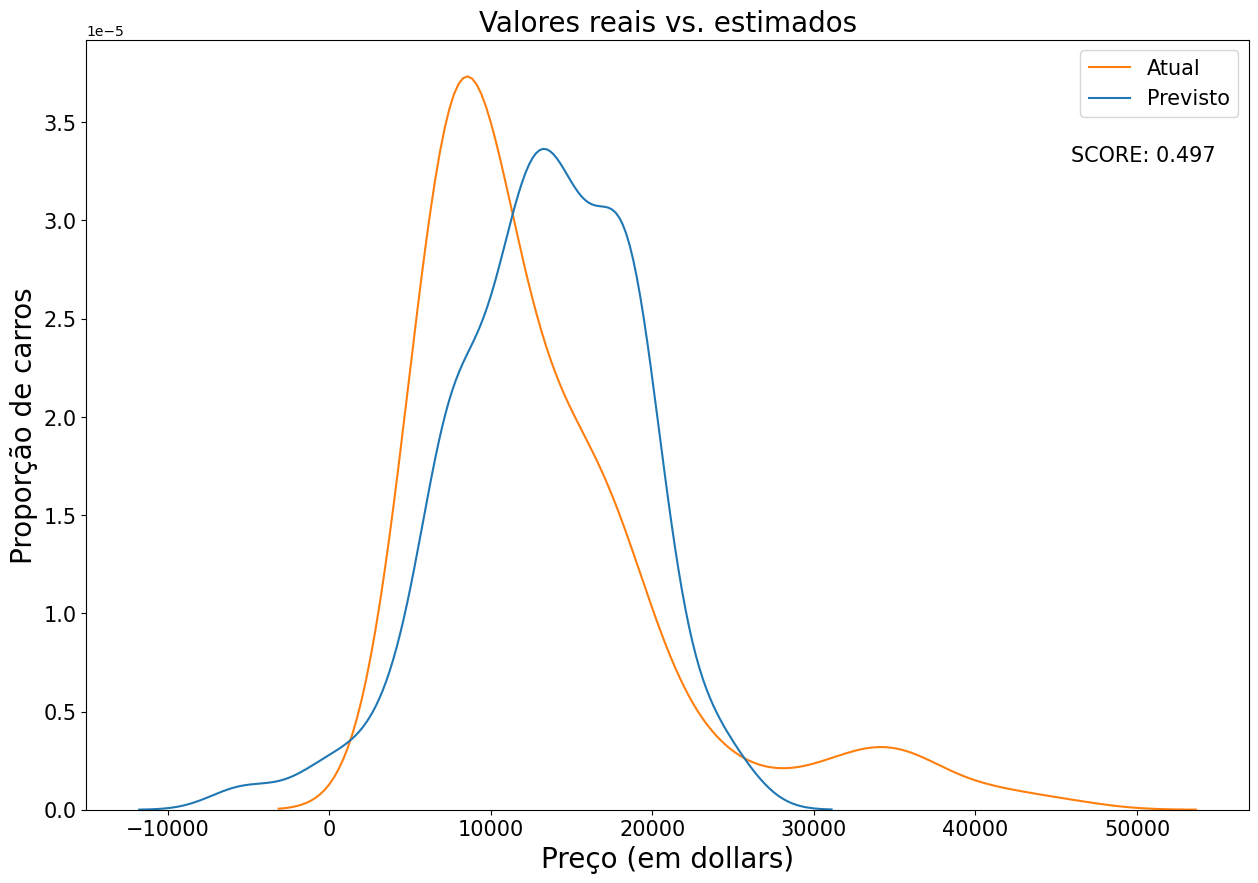

In [16]:
# Criando a área do gráfico
plt.figure(figsize=(15, 10))

# Criando um gráfico de densidade
sns.kdeplot(data = df_linear[['Yhat','price']]) 

# Adicionando títulos
plt.title('Valores reais vs. estimados', size = 20)

# Adicionando o nome do eixo x
plt.xlabel('Preço (em dollars)', size = 20)

# Adicionando o nome do eixo y
plt.ylabel('Proporção de carros', size = 20)

# Configurando tamanho do eixo y
plt.yticks(size = 15)

# Configurando tamanho do eixo x
plt.xticks(size = 15) 

# Adicionando legendas
plt.legend(labels=["Atual","Previsto"], fontsize = 15, bbox_to_anchor=(1, 1))

# Criando um objeto para guardadr o Score(R2)
tt = "SCORE: %.3f" % R2

# Passando o objeto de texto na posição desejada
plt.text(45900, 0.000033, tt, size = 15)


## MAE-MAPE-MSE-RMSE

In [17]:
# Criando uma nova coluna com os desvios

df_linear.loc[:,'Deviation (error)'] = df_linear['Yhat']-df_linear['price']
df_linear.head(20)

,price,highway_mpg,Yhat,YhatCalc,Deviation (error)
0,13495.0,27,16236.504643,16236.504643,2741.504643
1,16500.0,27,16236.504643,16236.504643,-263.495357
2,16500.0,26,17058.238022,17058.238022,558.238022
3,13950.0,30,13771.304508,13771.304508,-178.695492
4,17450.0,22,20345.171535,20345.171535,2895.171535
5,15250.0,25,17879.971400,17879.971400,2629.971400
6,17710.0,25,17879.971400,17879.971400,169.971400
7,18920.0,25,17879.971400,17879.971400,-1040.028600
8,23875.0,20,21988.638292,21988.638292,-1886.361708
9,16430.0,29,14593.037887,14593.037887,-1836.962113


In [18]:
# Criando uma nova coluna com o erro absoluto
df_linear.loc[:,'AbsDeviation'] = abs(df_linear['Yhat']-df_linear['price'])
df_linear.head(20)

,price,highway_mpg,Yhat,YhatCalc,Deviation (error),AbsDeviation
0,13495.0,27,16236.504643,16236.504643,2741.504643,2741.504643
1,16500.0,27,16236.504643,16236.504643,-263.495357,263.495357
2,16500.0,26,17058.238022,17058.238022,558.238022,558.238022
3,13950.0,30,13771.304508,13771.304508,-178.695492,178.695492
4,17450.0,22,20345.171535,20345.171535,2895.171535,2895.171535
5,15250.0,25,17879.971400,17879.971400,2629.971400,2629.971400
6,17710.0,25,17879.971400,17879.971400,169.971400,169.971400
7,18920.0,25,17879.971400,17879.971400,-1040.028600,1040.028600
8,23875.0,20,21988.638292,21988.638292,-1886.361708,1886.361708
9,16430.0,29,14593.037887,14593.037887,-1836.962113,1836.962113


In [19]:
# Criando uma nova coluna com o erro absoluto relativo
df_linear.loc[:,'AbsRelativeDeviation'] = df_linear['AbsDeviation']/df_linear['price']
df_linear.head(20)

,price,highway_mpg,Yhat,YhatCalc,Deviation (error),AbsDeviation,AbsRelativeDeviation
0,13495.0,27,16236.504643,16236.504643,2741.504643,2741.504643,0.203150
1,16500.0,27,16236.504643,16236.504643,-263.495357,263.495357,0.015969
2,16500.0,26,17058.238022,17058.238022,558.238022,558.238022,0.033833
3,13950.0,30,13771.304508,13771.304508,-178.695492,178.695492,0.012810
4,17450.0,22,20345.171535,20345.171535,2895.171535,2895.171535,0.165912
5,15250.0,25,17879.971400,17879.971400,2629.971400,2629.971400,0.172457
6,17710.0,25,17879.971400,17879.971400,169.971400,169.971400,0.009597
7,18920.0,25,17879.971400,17879.971400,-1040.028600,1040.028600,0.054970
8,23875.0,20,21988.638292,21988.638292,-1886.361708,1886.361708,0.079010
9,16430.0,29,14593.037887,14593.037887,-1836.962113,1836.962113,0.111805


In [20]:
# Quadrado do absoluto

df_linear.loc[:,'SquaredDeviation'] = df_linear['Deviation (error)']**2
df_linear.head(20)

,price,highway_mpg,Yhat,YhatCalc,Deviation (error),AbsDeviation,AbsRelativeDeviation,SquaredDeviation
0,13495.0,27,16236.504643,16236.504643,2741.504643,2741.504643,0.203150,7.515848e+06
1,16500.0,27,16236.504643,16236.504643,-263.495357,263.495357,0.015969,6.942980e+04
2,16500.0,26,17058.238022,17058.238022,558.238022,558.238022,0.033833,3.116297e+05
3,13950.0,30,13771.304508,13771.304508,-178.695492,178.695492,0.012810,3.193208e+04
4,17450.0,22,20345.171535,20345.171535,2895.171535,2895.171535,0.165912,8.382018e+06
5,15250.0,25,17879.971400,17879.971400,2629.971400,2629.971400,0.172457,6.916750e+06
6,17710.0,25,17879.971400,17879.971400,169.971400,169.971400,0.009597,2.889028e+04
7,18920.0,25,17879.971400,17879.971400,-1040.028600,1040.028600,0.054970,1.081659e+06
8,23875.0,20,21988.638292,21988.638292,-1886.361708,1886.361708,0.079010,3.558360e+06
9,16430.0,29,14593.037887,14593.037887,-1836.962113,1836.962113,0.111805,3.374430e+06


MAE
$$
MAE = \dfrac{1}{n}\sum_{i=1}^n{|y_i-f_i|}
$$
MAPE
$$
MAPE = \dfrac{100}{n}\sum_{i=1}^n{\left|\dfrac{y_i-f_i}{y_i}\right|}
$$
MSE
$$
MSE = \dfrac{1}{n}\sum_{i=1}^n{(y_i-f_i)^2}
$$
RMSE
$$
RMSE = \sqrt{MSE} = \sqrt{\dfrac{1}{n}\sum_{i=1}^n{(y_i-f_i)^2}}
$$



onde:
- $n$: quantidade de dados;
- $y_i$: valor real das observações;
- $f_i$: valor previsto das observações.

In [21]:
#Mean Absolute Error - Erro absoluto médio
MAE = df_linear['AbsDeviation'].mean()

#Mean Absolute Percentage Error - Erro absoluto percentual médio 
MAPE = 100*df_linear['AbsRelativeDeviation'].mean()

#Mean Squared Error - Erro quadrado médio
MSE = df_linear['SquaredDeviation'].mean()

#Root Mean Square Error = Raiz do erro quadrado médio
RMSE = math.sqrt(MSE)

# Printando os valores
print(f'MAE: {MAE:.3f}. MAPE: {MAPE:.3f}. MSE: {MSE:.3f}. RMSE: {RMSE:.3f}.')

MAE: 4054.993. MAPE: 33.157. MSE: 31635042.945. RMSE: 5624.504.


Text(0.5, 0, 'Resíduo (em dollars)')

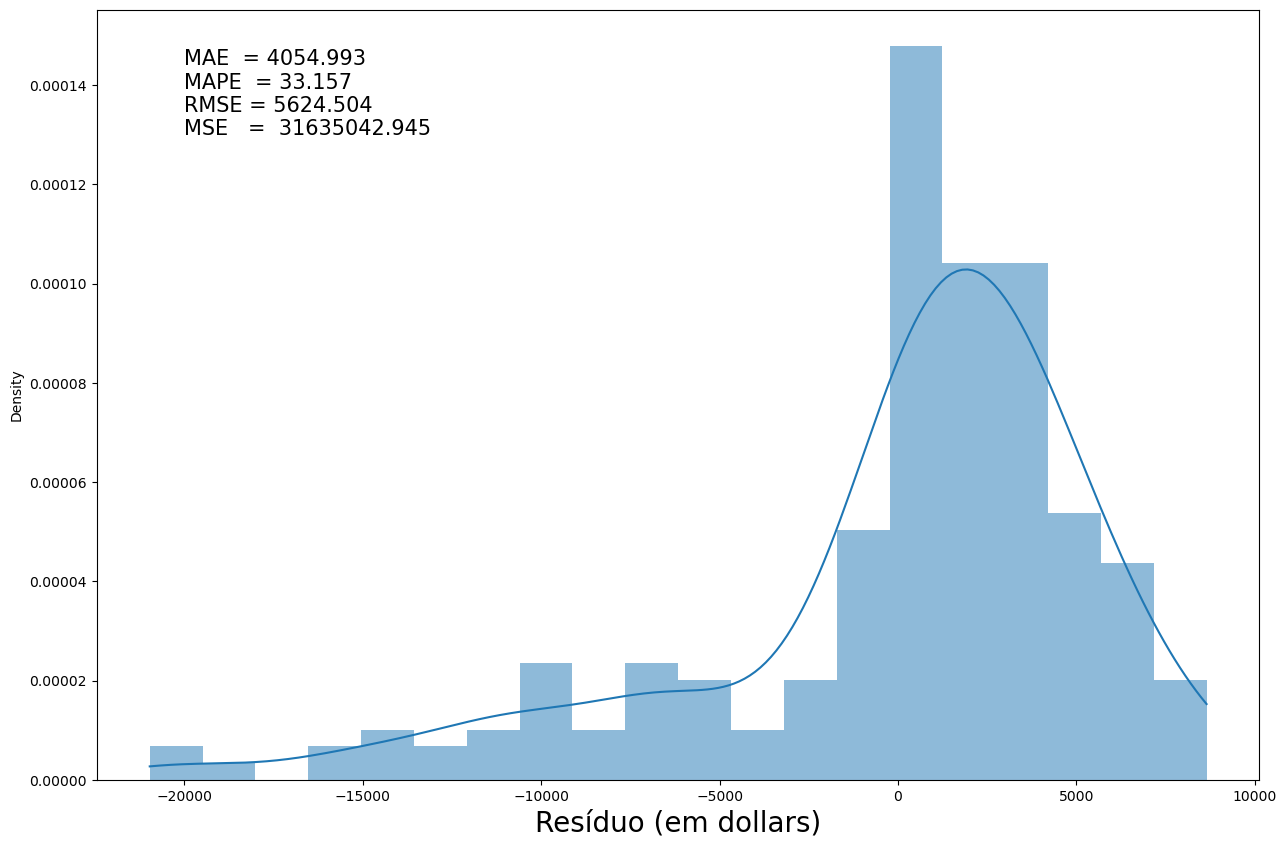

In [22]:
# Criando área para plotar o gráfico
plt.figure(figsize=(15, 10))

# Criando um objeto de texto com os erros
tt = "MAE  = %.3f \nMAPE  = %.3f \nRMSE = %.3f \nMSE   =  %.3f" % (MAE, MAPE, RMSE, MSE)

# Criando um histograma com densidade
sns.histplot(x=df_linear['Deviation (error)'], kde=True, stat="density", linewidth=0)

# Acrescentando o objeto de texto na tela na posição especificada
plt.text(-20000, 0.00013, tt, size=15, color = "black")

# Acrescentando o título do eixo X
plt.xlabel('Resíduo (em dollars)', size = 20)

## Fique Conectado

- [![YouTube](https://img.icons8.com/ios-filled/40/000000/youtube-play.png)](https://www.youtube.com/@LigaDataScience/videos)  
  Explore nossos vídeos educacionais e webinars sobre ciência de dados, machine learning e inteligência artificial. Inscreva-se para não perder nenhuma atualização!

- [![LinkedIn](https://img.icons8.com/ios-filled/40/000000/linkedin.png)](https://www.linkedin.com/company/liga-data-science-ufpr/)  
  Siga-nos no LinkedIn para as últimas novidades, oportunidades de carreira e networking profissional no campo da ciência de dados.

- [![Instagram](https://img.icons8.com/ios-filled/40/000000/instagram-new.png)](https://www.instagram.com/ligadatascience/)  
  Confira nosso Instagram para conteúdos dos bastidores, destaques de eventos e o dia a dia da Liga Data Science. Faça parte da nossa jornada!


## Autores

<a href="https://www.linkedin.com/in/eduardopecora/" target="_blank">Eduardo Pecora</a>, <a href="https://www.linkedin.com/in/hesauhugocavalcanti/" target="_blank">Hesau Hugo</a> , <a href="https://www.linkedin.com/in/joão-gabriel-santin-botelho/" target="_blank">João Gabriel</a>

## Referências:

Traduzido e inspirado do material desenvolviedo pela IBM:
<a href="https://www.linkedin.com/in/joseph-s-50398b136/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkDA0101ENSkillsNetwork20235326-2021-01-01" target="_blank">Joseph Santarcangelo</a>
<br>

* Documentação da biblioteca <a href="https://pandas.pydata.org/docs/">Pandas</a>
* Documentação da biblioteca <a href="https://seaborn.pydata.org/">Seaborn</a>
* Documentação do biblioteca <a href="https://matplotlib.org/">Matplotlib</a>
* Documentação do biblioteca <a href="https://numpy.org/devdocs/reference/index.html">Numpy</a>

## Log de modificações

| Data | Versão | Modificado por | Descrição |
| -----------| ------- | ---------- | ---------------------------------- |
| 04-04-2021       | 1.0     | Eduardo Pecora    | Inicial               |
| 03-11-2021       | 1.1     | Eduardo Pecora    | Estrutura Aula        |
| 08-03-2022       | 1.2     | Eduardo Pecora    | GitHub                |
| 17-04-2023       | 1.3     | Hesau Hugo        | Reestruturação        |
| 18-09-2024       | 1.4     | João Gabriel      | Atualização           |